In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("C:\\Users\\orbit\\Downloads\\diamonds.csv")

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
df.shape

(53940, 10)

In [9]:
#find categorical Values
categorical = [ col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
print(categorical)

There are 3 categorical variables
['cut', 'color', 'clarity']


In [10]:
#find nuerical values
numerical= [col for col in df.columns if df[col].dtype!='O']
print ('There are {} numerical variables'.format(len(numerical)))
print(numerical)

There are 7 numerical variables
['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


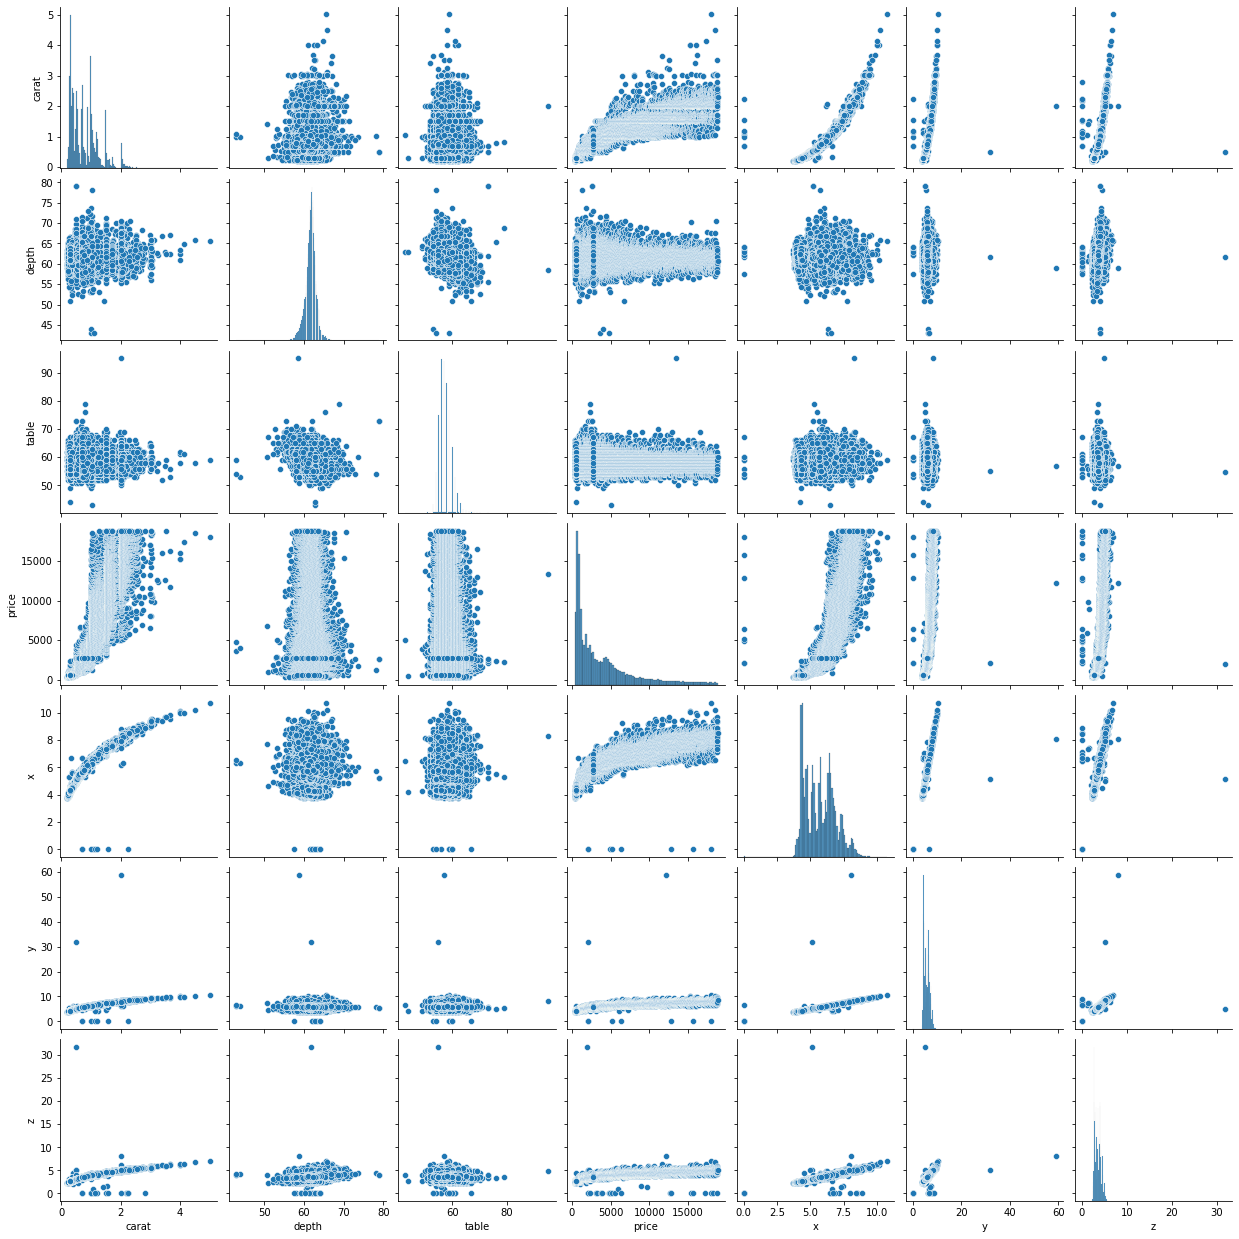

In [11]:
sns.pairplot(data=df)

In [12]:
df['price'].value_counts()

605      132
802      127
625      126
828      125
776      124
        ... 
13550      1
13014      1
6811       1
5354       1
11600      1
Name: price, Length: 11602, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Density'>

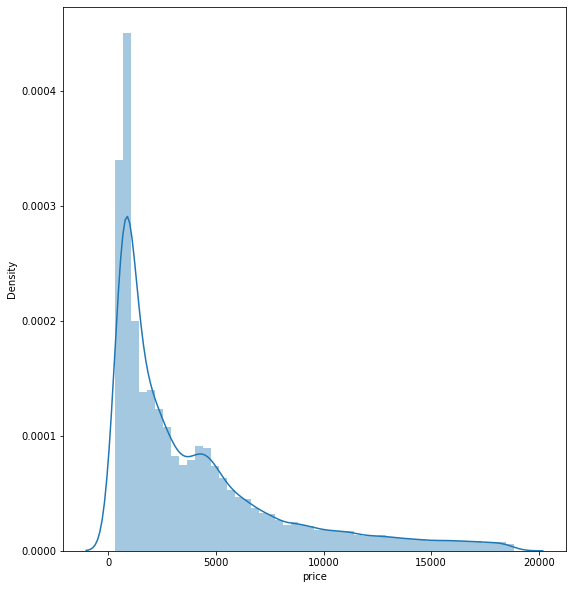

In [13]:
plt.figure(figsize=(9,10))
sns.distplot(df['price'])

Detect and Remove outliers with IQR Method

In [14]:
#Defining IQR
def drop_outliers(df, col_name):
    iqr = 1.5 *(np.percentile(df[col_name],75) - np.percentile(df[col_name],25))
    df.drop(df[df[col_name]>(iqr+ np.percentile(df[col_name],75))].index,inplace=True)
    df.drop(df[df[col_name]<(np.percentile(df[col_name],25)-iqr)].index,inplace=True)


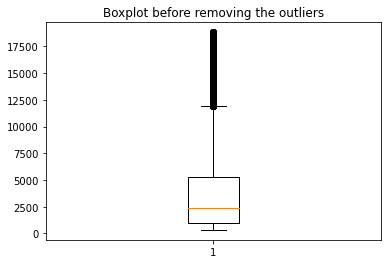

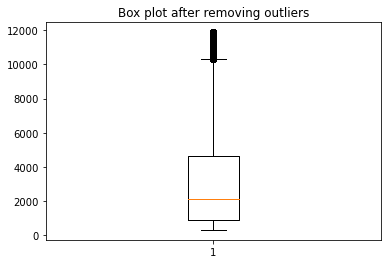

In [15]:
plt.boxplot(df['price'])
plt.title('Boxplot before removing the outliers')
plt.show()
drop_outliers(df,'price')
plt.boxplot(df['price'])
plt.title('Box plot after removing outliers')
plt.show()


<AxesSubplot:xlabel='carat', ylabel='Density'>

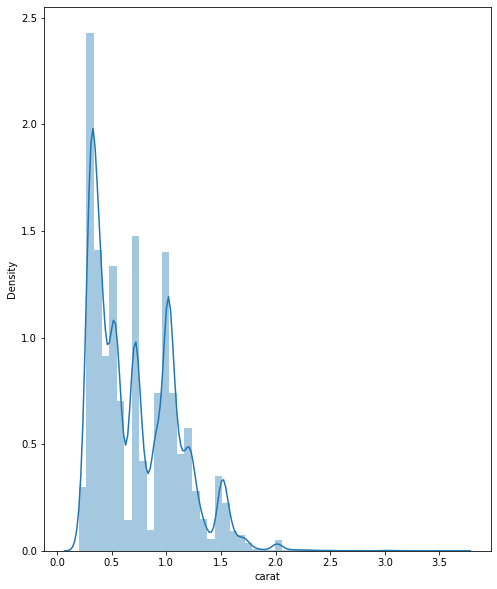

In [16]:
plt.figure(figsize=(8,10))
sns.distplot(df['carat'])

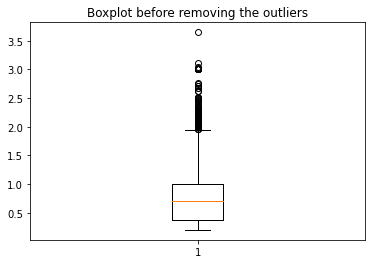

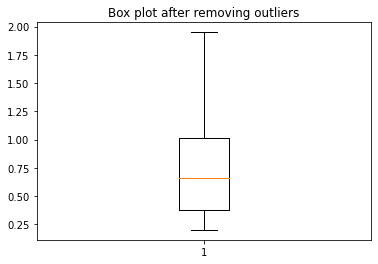

In [17]:
plt.boxplot(df['carat'])
plt.title('Boxplot before removing the outliers')
plt.show()
drop_outliers(df,'carat')
plt.boxplot(df['carat'])
plt.title('Box plot after removing outliers')
plt.show()


<AxesSubplot:xlabel='depth', ylabel='Density'>

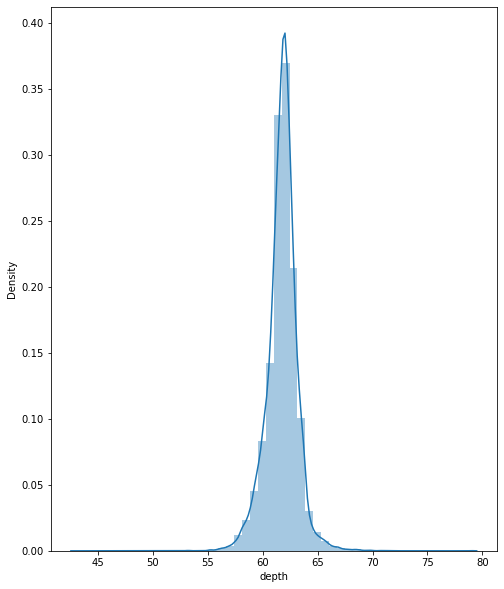

In [18]:
plt.figure(figsize=(8,10))
sns.distplot(df['depth'])

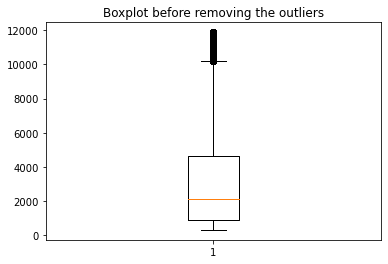

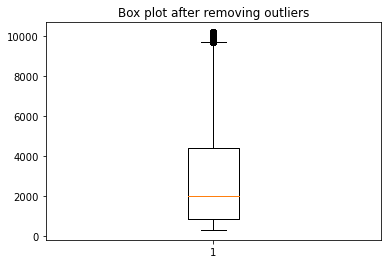

In [19]:
plt.boxplot(df['price'])
plt.title('Boxplot before removing the outliers')
plt.show()
drop_outliers(df,'price')
plt.boxplot(df['price'])
plt.title('Box plot after removing outliers')
plt.show()


<AxesSubplot:xlabel='table', ylabel='Density'>

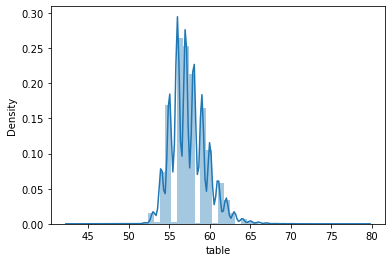

In [20]:
sns.distplot(df['table'])

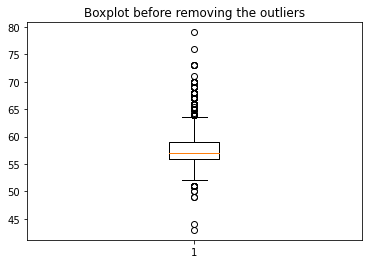

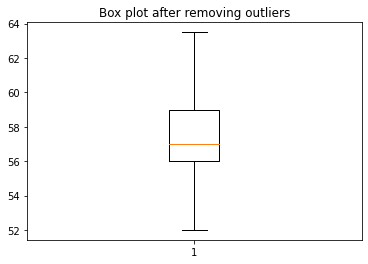

In [21]:
plt.boxplot(df['table'])
plt.title('Boxplot before removing the outliers')
plt.show()
drop_outliers(df,'table')
plt.boxplot(df['table'])
plt.title('Box plot after removing outliers')
plt.show()


<AxesSubplot:xlabel='x', ylabel='Density'>

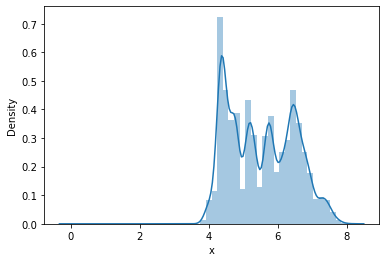

In [22]:
sns.distplot(df['x'])

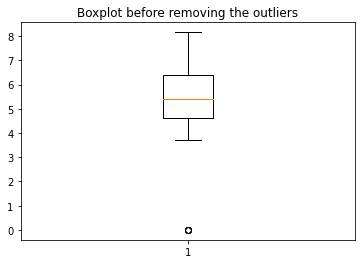

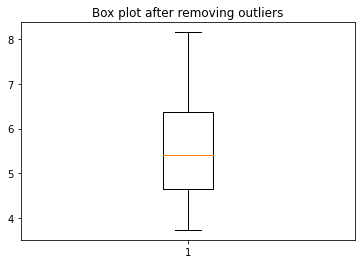

In [23]:
plt.boxplot(df['x'])
plt.title('Boxplot before removing the outliers')
plt.show()
drop_outliers(df,'x')
plt.boxplot(df['x'])
plt.title('Box plot after removing outliers')
plt.show()


<AxesSubplot:xlabel='y', ylabel='Density'>

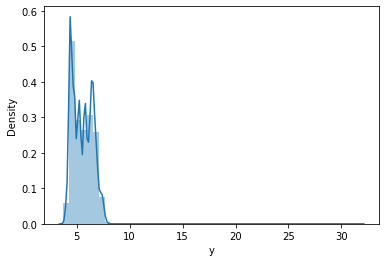

In [24]:
sns.distplot(df['y'])

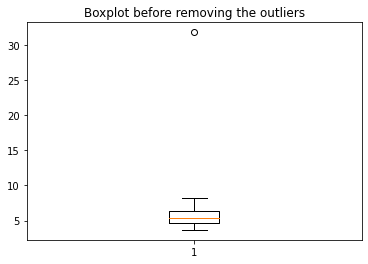

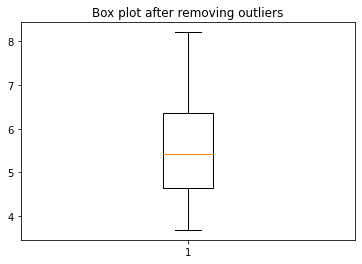

In [25]:
plt.boxplot(df['y'])
plt.title('Boxplot before removing the outliers')
plt.show()
drop_outliers(df,'y')
plt.boxplot(df['y'])
plt.title('Box plot after removing outliers')
plt.show()


<AxesSubplot:xlabel='z', ylabel='Density'>

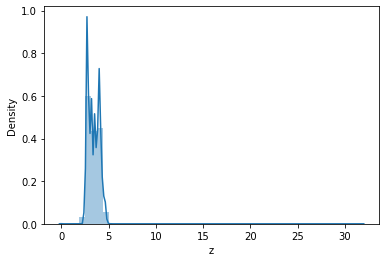

In [26]:
sns.distplot(df['z'])

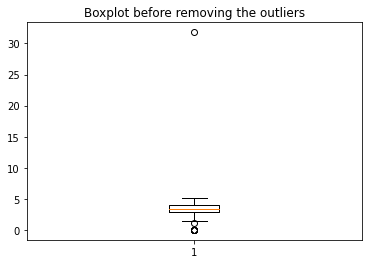

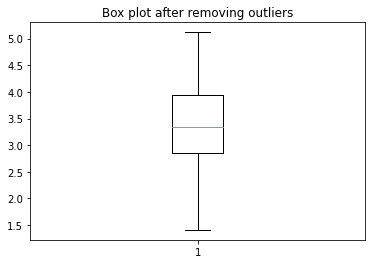

In [27]:
plt.boxplot(df['z'])
plt.title('Boxplot before removing the outliers')
plt.show()
drop_outliers(df,'z')
plt.boxplot(df['z'])
plt.title('Box plot after removing outliers')
plt.show()


In [28]:
cont_columns = df.select_dtypes(['int64','float64']).columns


In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[cont_columns] = sc.fit_transform(df[cont_columns])

In [30]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.316480,Ideal,E,SI2,-0.198270,-1.121151,-1.061154,-1.654360,-1.638066,-1.667279
1,-1.373154,Premium,E,SI1,-1.426150,1.769712,-1.061154,-1.717632,-1.786752,-1.871403
3,-1.146457,Premium,I,VS2,0.451784,0.324280,-1.057863,-1.390726,-1.372555,-1.327074
4,-1.089782,Good,J,SI2,1.101838,0.324280,-1.057451,-1.243091,-1.245110,-1.122950
5,-1.288142,Very Good,J,VVS2,0.740697,-0.157530,-1.057040,-1.664906,-1.659307,-1.582228


# Handle categorical columns

In [31]:
df_n = pd.get_dummies(data=df,drop_first=True, columns = ['cut','color','clarity'])
df_n.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.316480,-0.198270,-1.121151,-1.061154,-1.654360,-1.638066,-1.667279,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.373154,-1.426150,1.769712,-1.061154,-1.717632,-1.786752,-1.871403,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,-1.146457,0.451784,0.324280,-1.057863,-1.390726,-1.372555,-1.327074,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,-1.089782,1.101838,0.324280,-1.057451,-1.243091,-1.245110,-1.122950,1,0,0,...,0,0,1,0,0,1,0,0,0,0
5,-1.288142,0.740697,-0.157530,-1.057040,-1.664906,-1.659307,-1.582228,0,0,0,...,0,0,1,0,0,0,0,0,0,1


Now we can use algorithm


In [32]:
from sklearn.model_selection import train_test_split
X=df_n.drop(['price'],axis=1)
y=df_n['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


# KNN from scratch

In [33]:
# K-Nearest Neighbors Regressor from SKLEARn
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
sk_preds = knn.predict(X_test)
print(mean_squared_error(y_test,sk_preds))
print(r2_score(y_test,sk_preds))

0.04295032537038991
0.9569324564213519


In [34]:
class custom_KNNR():

    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self,X_test,n_neighbors):
        
        self.X_train = X_train
        self.y_train = y_train
        y_pred = np.zeros(y_test.shape)
        self.n_neighbors = n_neighbors
        
        for i in range(len(X_test)):

            euc_dist = np.sqrt(np.sum((X_train - X_test.iloc[i]) ** 2 ,axis=1))
            y_pred[i] = y_train.iloc[np.argsort(euc_dist,axis=0)[:n_neighbors]].mean()
            if i % 1000 == 0 :
                print(f"Successfully Completed {i} Records...")
        print("Model Predictions Completed .. ")
        return y_pred
    


In [35]:
# Creatinga an Object for the Custom KNN Class
knn = custom_KNNR()

In [36]:
# Fitting the Training Data into The Custom Function
knn.fit(X_train,y_train)


In [38]:
# Making the Predictions using 7 Nearest Neighbors
preds = knn.predict(X_test,n_neighbors=7)

Successfully Completed 0 Records...
Successfully Completed 1000 Records...
Successfully Completed 2000 Records...
Successfully Completed 3000 Records...
Successfully Completed 4000 Records...
Successfully Completed 5000 Records...
Successfully Completed 6000 Records...
Successfully Completed 7000 Records...
Successfully Completed 8000 Records...
Successfully Completed 9000 Records...
Successfully Completed 10000 Records...
Successfully Completed 11000 Records...
Successfully Completed 12000 Records...
Model Predictions Completed .. 


In [39]:
# Calculating the Mean Squared Error
mean_squared_error(y_test,preds)


0.04390317351579931

In [40]:
# Calculating the R-Squared Score
r2_score(y_test,preds)

0.9559770078031549

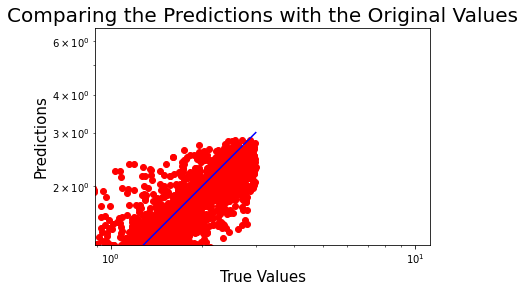

In [43]:
# Plotting the Results with the Original Values
plt.scatter(y_test, preds, c='red')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(preds), max(y_test))
p2 = min(min(preds), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Comparing the Predictions with the Original Values",fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [45]:
# Finding the Predictions with Different K-Values.
predictions = []
r2_scores = []
for i in range(5,16,2):
    print(i)
    knn = custom_KNNR()
    knn.fit(X_train,y_train)
    preds = knn.predict(X_test,n_neighbors=i)
    predictions.append(preds)
    r2 = r2_score(y_test,preds)
    r2_scores.append(r2)
    print(r2)

5
Successfully Completed 0 Records...
Successfully Completed 1000 Records...
Successfully Completed 2000 Records...
Successfully Completed 3000 Records...
Successfully Completed 4000 Records...
Successfully Completed 5000 Records...
Successfully Completed 6000 Records...
Successfully Completed 7000 Records...
Successfully Completed 8000 Records...
Successfully Completed 9000 Records...
Successfully Completed 10000 Records...
Successfully Completed 11000 Records...
Successfully Completed 12000 Records...
Model Predictions Completed .. 
0.9569319932162066
7
Successfully Completed 0 Records...
Successfully Completed 1000 Records...
Successfully Completed 2000 Records...
Successfully Completed 3000 Records...
Successfully Completed 4000 Records...
Successfully Completed 5000 Records...
Successfully Completed 6000 Records...
Successfully Completed 7000 Records...
Successfully Completed 8000 Records...
Successfully Completed 9000 Records...
Successfully Completed 10000 Records...
Successfull

Text(0, 0.5, 'Error_rate')

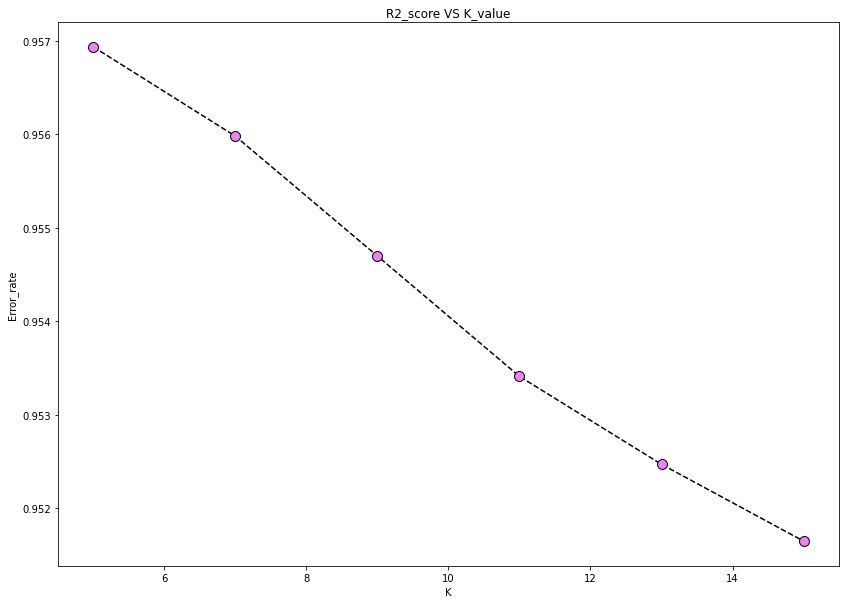

In [46]:
# Plotting the R2-Score for the Comparision with Different K-Values
plt.figure(figsize=(14,10),)
plt.plot(range(5,16,2),r2_scores,color='black',linestyle='dashed',marker='o',
        markerfacecolor='violet',markersize=10)
plt.title("R2_score VS K_value")
plt.xlabel('K')
plt.ylabel('Error_rate')

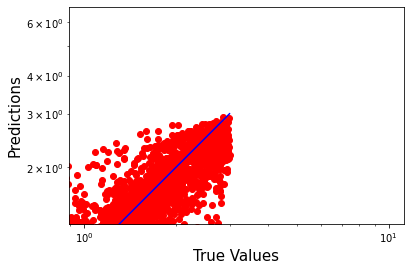

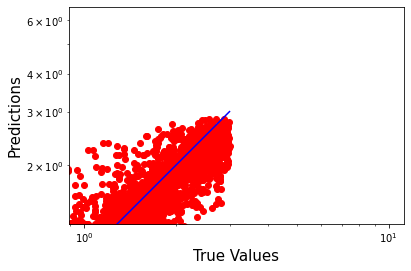

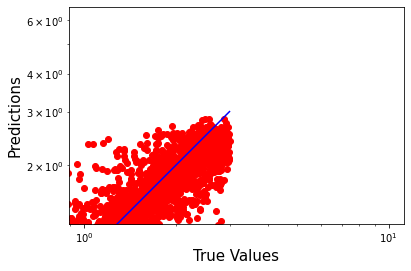

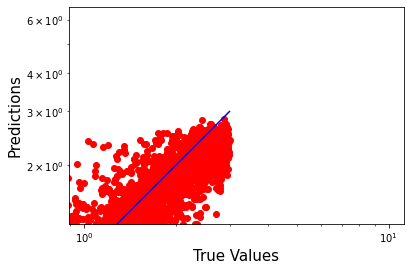

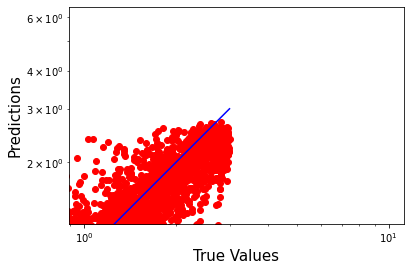

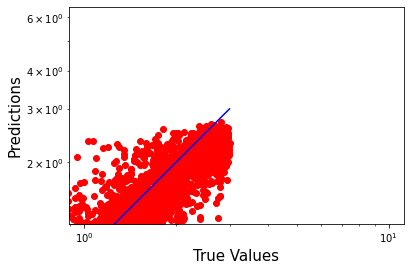

In [48]:
# Comparing the Different Predictions from Different K-Values with the Original Values.
for pred in predictions:
    plt.scatter(y_test, pred, c='red')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(preds), max(y_test))
    p2 = min(min(preds), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()